Wine veri seti 178 tane farklı şaraptan oluşmaktadır ve bu şarapların farklı özellikleri vardır. Wine veri setinde 13 sütun bulunmaktadır yani 13 farklı özellik vardır. Bu özellikler şarabın tadı, kokusu ve yapısal özelliklerini içerir. Şarabın alkol yüzdesi(% Vol), malik asit içeriği(g/l), kül miktarı(g/l), külün alkalinliği(g/l), magnezyumu(mg/l), şarabın toplam fenolik içeriği(mg/l), flavonoid içeriği(mg/l), flavonoid olmayan fenolik içeriği(mg/l), proantosiyanidin içeriği(mg/l), renk yoğunluğu, şarabın tonu, şarabın optik yoğunluğu, şarabın prolin içeriği (mg/l) gibi özelliklerdir.

In [9]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

Veri setinde 13 sütun 178 satır vardır.

In [11]:
df.shape


(178, 13)

Veri setinin özelliklerini anlamak adına bazı istatistiklere bakmak iyi bir yoldur bunun için describe metodunu kullanmalıyız. Bu şekilde her özelliğin ortalaması, standart sapması, maximum ve minimum değerleri ve kartillerine bakarak veri seti hakkında daha fazla bilgi edinebiliriz.

In [12]:
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


info() metodu, veri setindeki her sütunun ismini, her sütundaki değerlerin sayısını, sütunların veri türlerini, bellek kullanımını ve eksik değerlerin sayısını gösterir. Bu sonuçlara göre veri setinde hiç null değer yoktur.

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Hangi değişken kombinasyonlarını seçeceğimize karar vermek için bütün değişkenlerin birbiriyle ilişkisine yani korelasyonuna bakmamız gerekiyor. Bunun için korelasyon matrisi oluşturulmuştur.

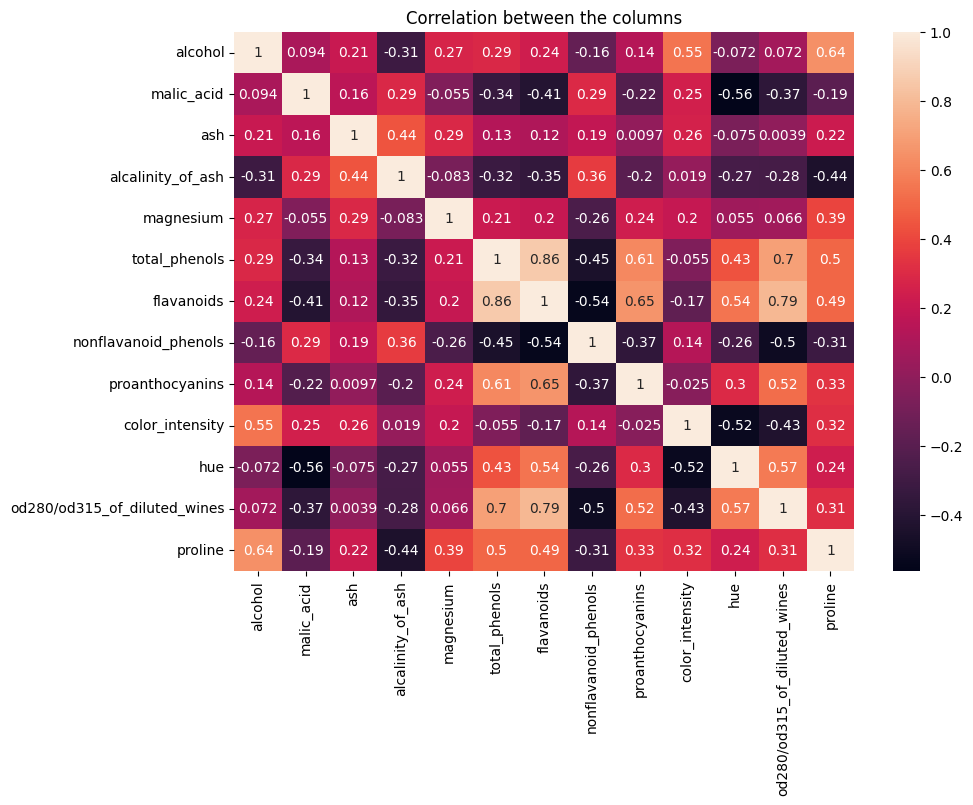

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


1. Alkol ve Flavonoidler

2. Malik Asit ve Renk Yoğunluğu

3. Flavonoidler ve Renk Yoğunluğu

Bu kombinasyonları seçtim çünkü birbiriyle pozitif ve negatif korelasyona sahip değişkenlerdi. Örneğin; alkol ve flavonoidler arasında 0.24 korelasyon çıkmıştır yani pozitif yönlü bi korelasyon vardır. Daha yüksek veya düşük korelasyonlar da vardı ama sadece korelasyon değerlerine bakarak karar vermek yanıltıcı olabilir.  İki değişken arasında yüksek korelasyon olması, bu değişkenlerin birbirleriyle doğrudan ilişkili oldukları anlamına gelmez. Ayrıca, farklı değişkenler arasındaki ilişkilerin birbiriyle etkileşimi ve diğer faktörler de dikkate alınması gereken önemli faktörlerdir.

Bu nedenle, seçtiğim üç kombinasyonu, sadece korelasyon matrisine göre değil, aynı zamanda veri setinin özelliklerini, değişkenler arasındaki ilişkileri ve potansiyel etkileşimleri dikkate alarak seçtim. Örneğin; Alkol ve flavonoidler, şarap tadının kalitesini etkiler. Flavonoidin yüksek olması sarabın kalitesini belirler.

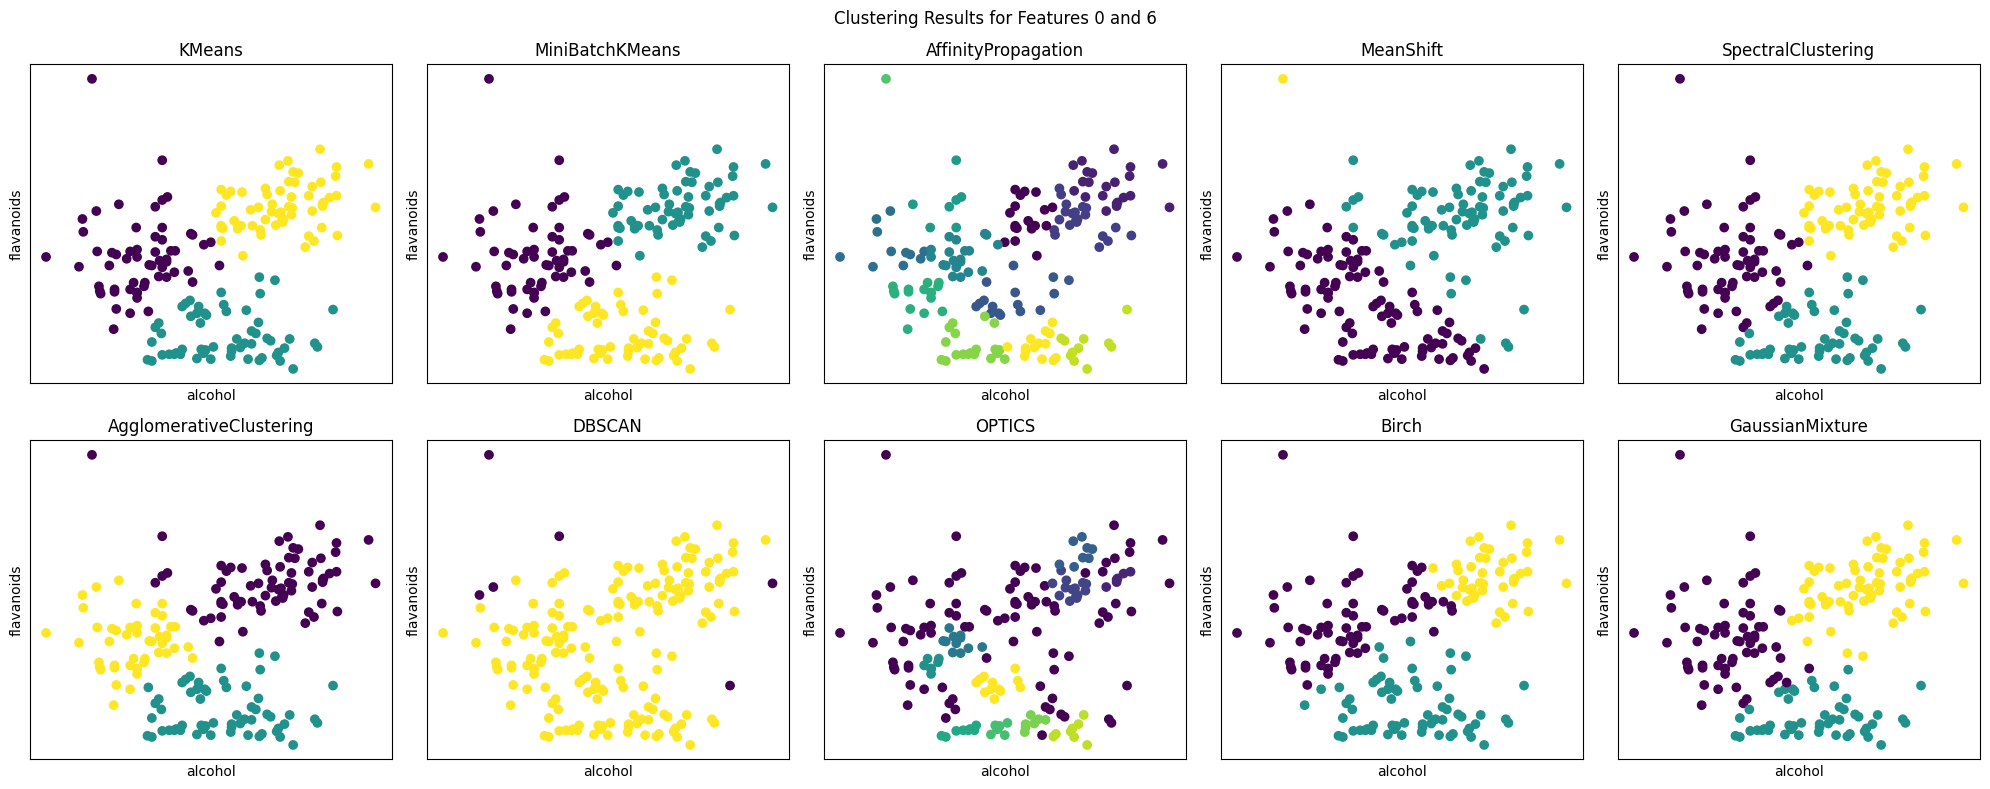

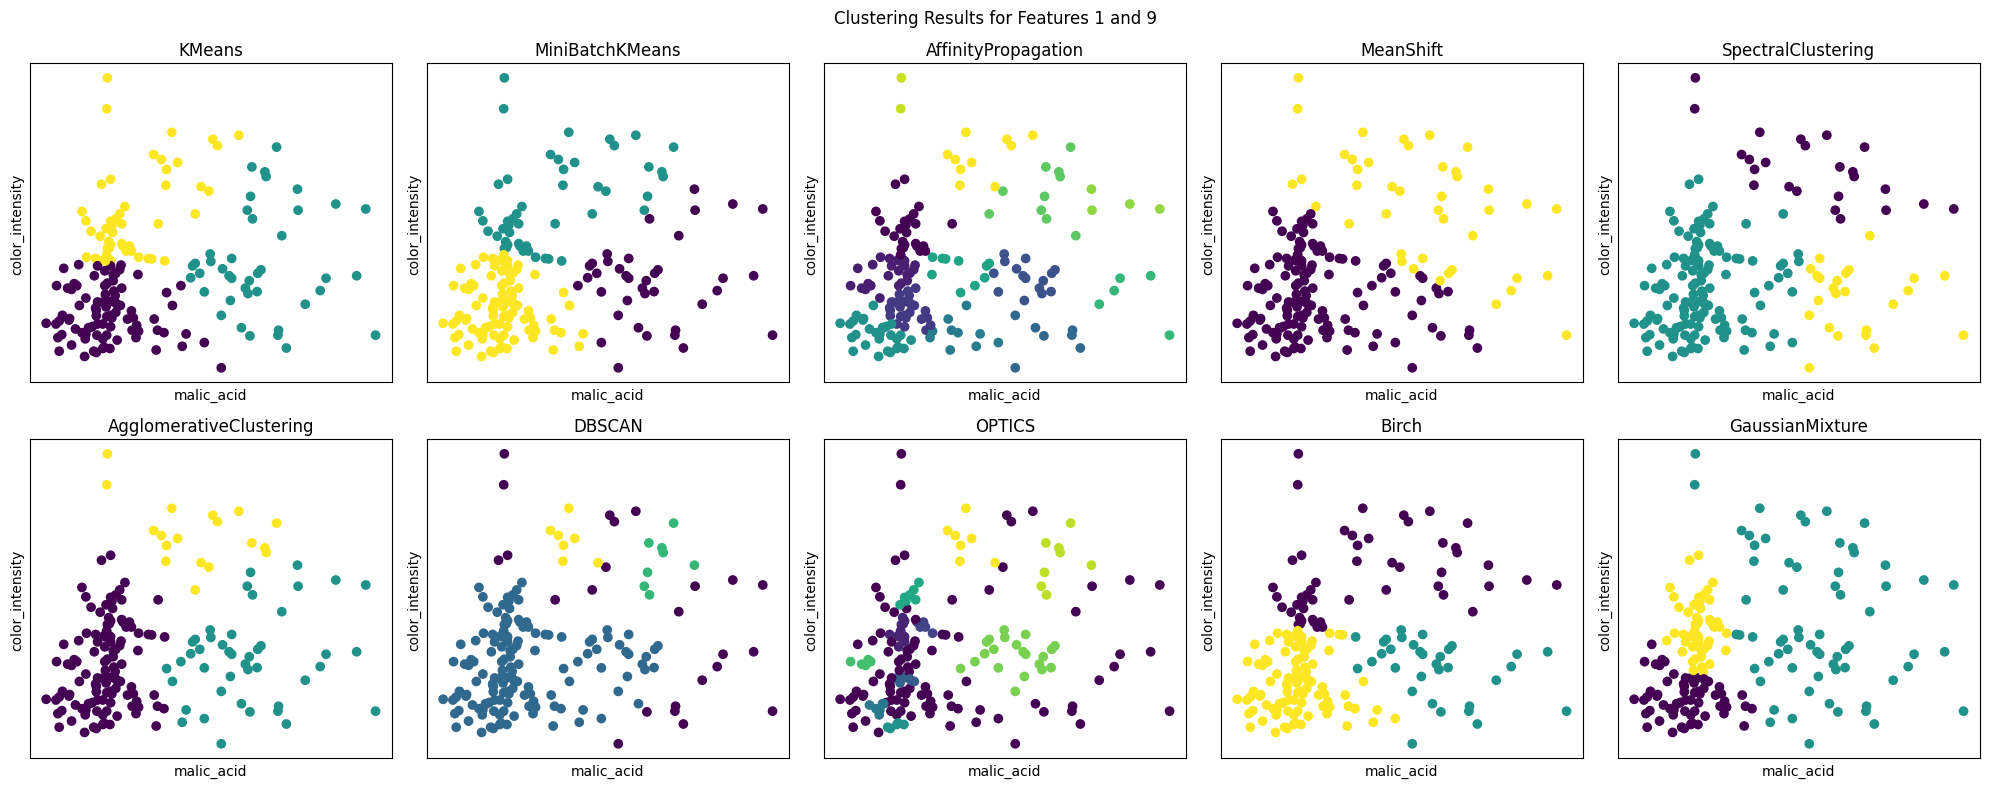

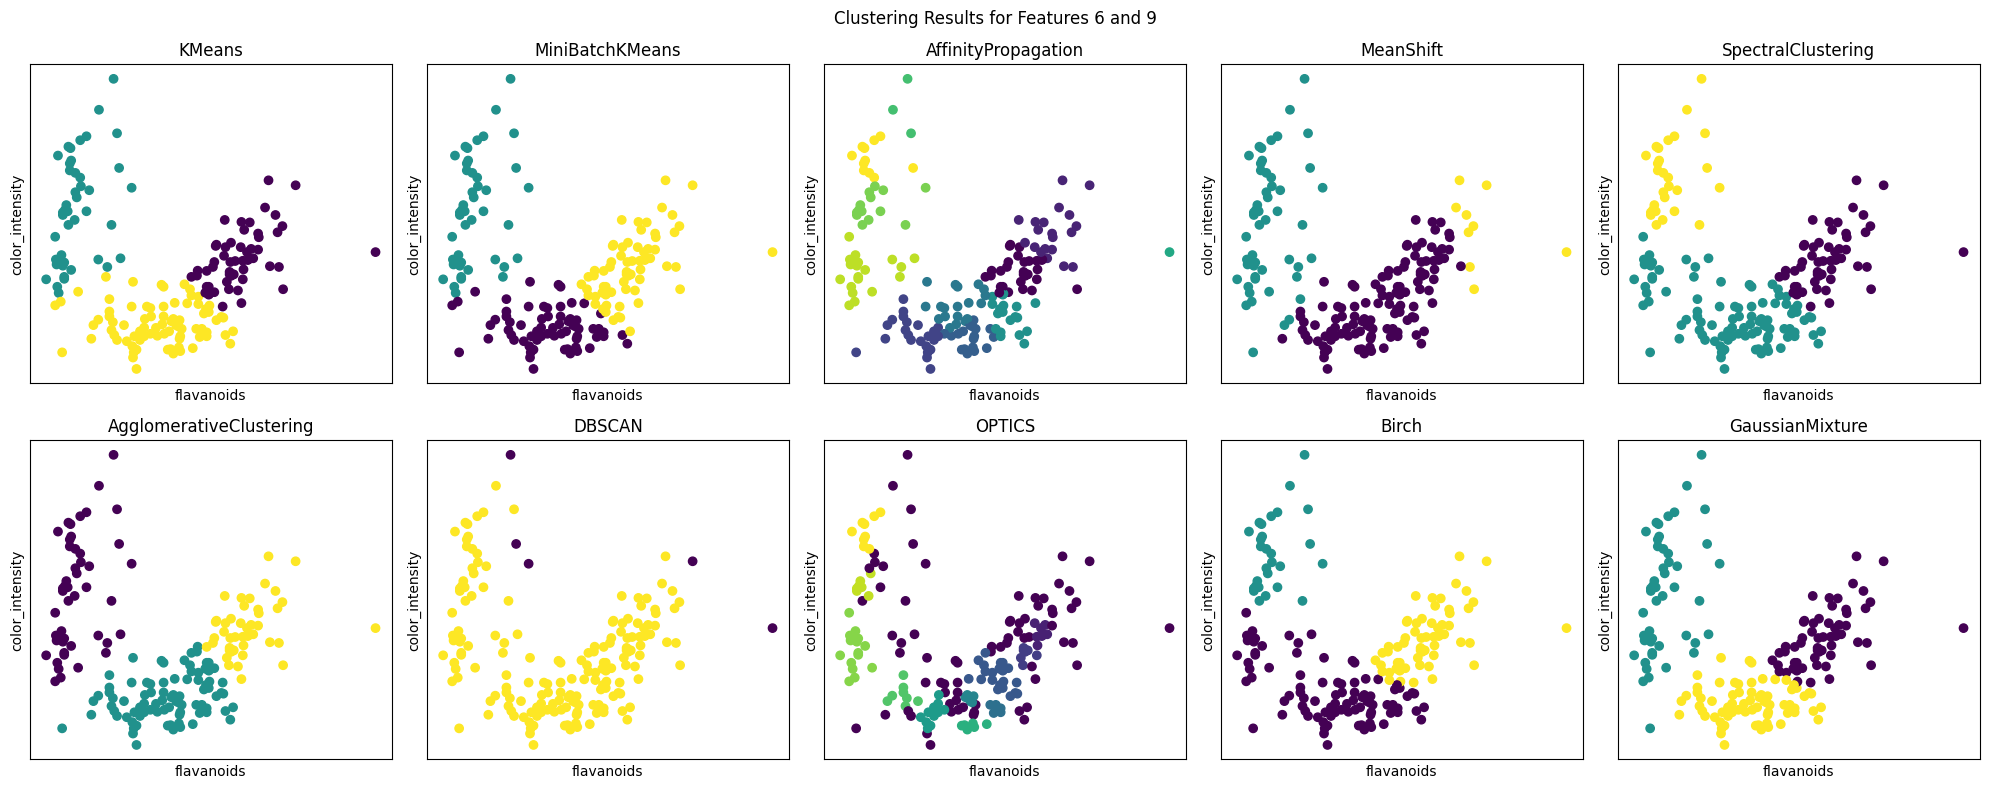

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import (KMeans, MiniBatchKMeans, AffinityPropagation, 
                             MeanShift, SpectralClustering, 
                             AgglomerativeClustering, DBSCAN, 
                             OPTICS, Birch)
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# wine veri setini yükleme
wine = load_wine()
X = wine.data
y = wine.target

# Veriyi standartlaştırma
X = StandardScaler().fit_transform(X)

# kombinasyonları belirleme
combinations = [(0, 6), (1, 9), (6, 9)]

# kümeleme algoritmalarını tanımlama
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
mbkmeans = MiniBatchKMeans(n_clusters=3, random_state=42, n_init='auto')
affprop = AffinityPropagation(damping=0.5, random_state=0)
meanshift = MeanShift()
spectral = SpectralClustering(n_clusters=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
optics = OPTICS(min_samples=5)
birch = Birch(n_clusters=3)
gmm = GaussianMixture(n_components=3, random_state=42)

# algortimaların listesini tanımlama
algorithms = [kmeans, mbkmeans, affprop, meanshift,
              spectral, agg, dbscan, optics, birch, gmm]

# algoritmaları kullanarak dağılım grafiği oluşturma
for i, (feature1, feature2) in enumerate(combinations):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

    for j, algorithm in enumerate(algorithms):
        y_pred = algorithm.fit_predict(X[:, [feature1, feature2]])

        ax = axes[j//5, j % 5]
        ax.scatter(X[:, feature1], X[:, feature2], c=y_pred)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_xlabel(wine.feature_names[feature1])
        ax.set_ylabel(wine.feature_names[feature2])
        ax.set_title(type(algorithm).__name__)

    plt.suptitle(f'Clustering Results for Features {feature1} and {feature2}')
    plt.tight_layout()
    plt.show()


İlk kombinasyonda alkol ve flavonoidler için; K-Means ve Mini Batch K-Means, Spectral Clustering algoritmaları iyi bir şekilde ayrılmış kümeler üretmiştir, diğer algoritmalar yeterli sonuçlar üretmez. Özellikle, DBSCAN algoritması neredeyse hiçbir küme ayırımı yapmamıştır.

İkinci kombinasyonda malik asit ve renk yoğunluğu için; KMeans ve MiniBatchKMeans, MeanShift, Birch algoritmaları en iyi sonuçları üretirken, Spectral Clustering'de benzer şekilde iyi sonuçlar üretir. Bu sefer DBSCAN algoritması bu kombinasyon için daha iyi sonuçlar verdi. OPTICS algoritması kötü bir küme ayrımı yaptı.

Üçüncü kombinasyon flavonoidler ve renk yoğunluğu kullanıldığında, K-Means, Agglomerative Clustering, Gaussian Mixture, Spectral Clustering algoritmaları iyi sonuç üretmiştir. Ama DBSCAN yine neredeyse kümeleme gerçekleştiremedi ve OPTICS algoritması kötü bi kümeleme yaptı.

(Parametreleri değiştirdiğimizde örneğin DBSCAN de epsilon değerini 0.3 olarak ayarladığımızda kümeleme konusunda daha iyi sonuçlar verdi ama yinede başarılı bir kümeleme gerçekleşmediği için epsilon değeri 0.5 olarak bırakıldı)

Sonuç olarak, KMeans ve MiniBatchKMeans algoritmaları farklı özellik kombinasyonlarında iyi sonuçlar üretti.

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import (KMeans, MiniBatchKMeans, AffinityPropagation,
                             MeanShift, DBSCAN, OPTICS, Birch,
                             SpectralClustering, AgglomerativeClustering)
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (silhouette_score, davies_bouldin_score,
                             calinski_harabasz_score)

# Wine veri setini sckit learnden yüklüyoruz
wine = load_wine()
X = wine.data
y = wine.target

# Veri setini standartlaştırmalıyız
X = StandardScaler().fit_transform(X)

# değişken kombinasyonlarını belirliyoruz
combinations = [(0, 6), (1, 9), (6, 9)]

# kümeleme algoritmalarını tanımlama
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
mbkmeans = MiniBatchKMeans(n_clusters=3, random_state=42, n_init='auto')
affprop = AffinityPropagation(damping=0.5, random_state=0)
meanshift = MeanShift()
spectral = SpectralClustering(n_clusters=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
optics = OPTICS(min_samples=5)
birch = Birch(n_clusters=3)
gmm = GaussianMixture(n_components=3, random_state=42)

algorithms = [kmeans, mbkmeans, affprop, meanshift,
              spectral, agg, dbscan, optics, birch, gmm]

# performans ölçümlerinin hesaplanması
for i, (feature1, feature2) in enumerate(combinations):
    print(
        f"\n\nClustering Results for Features {feature1} and {feature2}:\n{'-'*80}")
    for algorithm in algorithms:
        algorithm_name = type(algorithm).__name__
        y_pred = algorithm.fit_predict(X[:, [feature1, feature2]])
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.dtype('int32'))

        if algorithm_name == 'DBSCAN' and len(set(y_pred)) == 1:
            print(f"{algorithm_name}: Detected only one cluster")
            continue

        sil_score = round(silhouette_score(
            X[:, [feature1, feature2]], y_pred), 3)
        db_score = round(davies_bouldin_score(
            X[:, [feature1, feature2]], y_pred), 3)
        ch_score = round(calinski_harabasz_score(
            X[:, [feature1, feature2]], y_pred), 3)

        print(f"{algorithm_name}:")
        print(f"Silhouette: {sil_score}")
        print(f"Davies-Bouldin: {db_score}")
        print(f"Calinski-Harabasz: {ch_score}\n")




Clustering Results for Features 0 and 6:
--------------------------------------------------------------------------------
KMeans:
Silhouette: 0.499
Davies-Bouldin: 0.718
Calinski-Harabasz: 224.291

MiniBatchKMeans:
Silhouette: 0.499
Davies-Bouldin: 0.718
Calinski-Harabasz: 224.291

AffinityPropagation:
Silhouette: 0.357
Davies-Bouldin: 0.776
Calinski-Harabasz: 194.95

MeanShift:
Silhouette: 0.433
Davies-Bouldin: 0.684
Calinski-Harabasz: 87.565

SpectralClustering:
Silhouette: 0.493
Davies-Bouldin: 0.722
Calinski-Harabasz: 220.582

AgglomerativeClustering:
Silhouette: 0.474
Davies-Bouldin: 0.704
Calinski-Harabasz: 198.501

DBSCAN:
Silhouette: 0.3
Davies-Bouldin: 2.624
Calinski-Harabasz: 4.353

OPTICS:
Silhouette: -0.024
Davies-Bouldin: 1.185
Calinski-Harabasz: 15.231

Birch:
Silhouette: 0.425
Davies-Bouldin: 0.843
Calinski-Harabasz: 178.249

GaussianMixture:
Silhouette: 0.485
Davies-Bouldin: 0.714
Calinski-Harabasz: 211.726



Clustering Results for Features 1 and 9:
-----------------

Silhouette skoru, kümelerin homojenliğini ve ayrıştırılabilirliğini ölçer, Davies-Bouldin skoru, bir kümenin diğer kümelerden ne kadar ayrıştığını ölçer. Calinski-Harabasz skoru ise, küme içi benzerliklerin küme dışı benzerliklere oranını ölçer. Bu nedenle, bu farklı skorların her biri kümelerin farklı özelliklerini değerlendirir ve performans değerlendirmesi için bir arada kullanılmaları daha doğru sonuçlar verir.

0 ve 6 için, KMeans ve MiniBatchKMeans algoritmaları en yüksek Silhouette ve Calinski-Harabasz skorunu vermiştir ve bu yüzden en iyi sonuçları vermişlerdir. Bu sonuçlara göre 3 veya 4 küme oluşturmak iyi olabilir.

1 ve 9 için, MeanShift ve SpectralClustering algoritmaları en yüksek Silhouette skorlarına sahiptir. Küme sayısı için 3 uygun olabilir.

6 ve 9 için, KMeans ve AgglomerativeClustering algoritmaları en yüksek Silhouette ve Calinski-Harabasz skorlarına sahiptir. Bu özellikler için en iyi sonuçları verirler. Bu sonuçlara göre, 3 veya 4 küme oluşturulabilir.

Sonuç olarak 3 veya 4 küme oluşturmak en uygun seçenek gibi görünmektedir ve her bir özellik kümesi için KMeans ve MiniBatchKMeans algoritmaları, en iyi sonuçları vermiştir.

Bu çalışmada scikit learn veri setlerinden Wine veri seti üzerinde denetimsiz öğrenme kümeleme algoritmaları denenmiştir. Bu çalışmada kullanılan algoritmalar şunlardır: KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch, GaussianMixture.
Bunun yanı sıra kümeleme algoritmalarının performansını ölçmek için Silhouette score, Davies-Bouldin score ve Calinski-Harabasz score metrikleri kullanılmıştır.

2.bölümde her algoritmanın sonuçları görselleştirilmiştir 3. bölümde algoritmaların performans ölçümleri yapılmıştır. Özellikle KMeans ve MiniBatchKMeans algoritmaları en iyi sonuçları vermiştir. En kötü sonucu veren algoritma ise DBSCAN ve Optics olmuştur. Diğer algoritmalar iyi sonuç verse de bazı durumlarda kötü sonuç vermişlerdir. (Yukarıda sonuçların görselleri bulunmaktadır)

Sonuç olarak farklı değişken kombinasyonlarında ve farklı kümeleme algoritmalarında sonuçların değişken olduğu saptanmıştır.